# **Predicting 2022 French presidential elections**


**Authors:** *Morvan Theo, Islamov Rustem, Popov Nicolai, Wasik Thomas, Bouley Alexis*


This challenge was done as a project for the Master 2 Data Science (2021/2022), DATACAMP course:
<br><br>


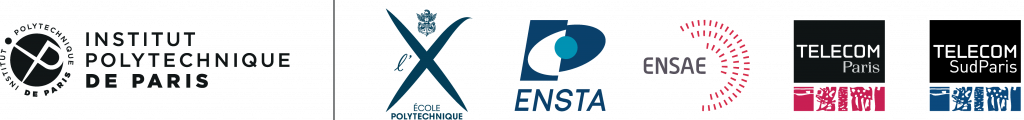

## Introduction

The French presidential elections are elections to elect the next president of the French republic. They take place every 5 years. 
It is quite common for candidates to run several times in a row. <br>
We are interested in a model to predict the percentage of votes that candidates will receive in relation to the number of registered voters. 
In this challenge we are interested in the three main candidates of the years 2017 and 2022: Melenchon, Macron and Le pen. <br>
We are also interested in the percentage of abstention, blank vote, and null vote as well as the total percentage of others candidates. <br>
From the scores achieved by each of these candidates in 2017 and social data, the objective is to predict the score of each of these candidates by city in 2022. <br>
<br>
In particular, in order to obtain a generalization for the following elections, it is preferable to use easily interpretable methods. For example, linear regressions where one can directly access the coefficients used by the model for each of the features.<br>



## Description of the Data

The data is composed of the percentages of votes received by each of the three major candidates in 2017. The dataset is also composed of the percentage of votes received by all the other candidates as well as the percentage of abstention, blank vote and null vote in 2017. <br>
<br>
A list of the features used is available here: https://www.insee.fr/fr/statistiques/6454652?sommaire=6454687#dictionnaire
<br>
<br>
These features are mainly composed of data related to the employment status of individuals as well as their ages and income.


### Output Data


The output data should be a ndarray of shape (batch_size, 7) with the following columns to predict:

- % Absence / registered
- % Null Vote / registered
- % Blank Vote / registered
- % Others Candidates Vote / registered
- % MACRON Vote / registered
- % MELENCHON Vote / registered
- % LE PEN Vote / registered

## Evaluation Metric

We aim to predict the percentage of vote by category. This is a regression problem, we therefore use the root mean square error here:


$MAE =\sqrt{\frac{1}{n \times p} \sum_{i=1}^n \sum_{j=1}^p (y_{i, j} - \hat{y}_{i, j})^2}$

## Download Data

you can download the data with the command:

In [ ]:
! python download_data.py

## Reading the data

You can get the data with the command:

In [1]:
import pandas as pd
import numpy as np
from problem import get_train_data, get_test_data

X_train, y_train = get_train_data()
X_test, y_test = get_test_data()

## Data Analysis

## Designing a submission

### Mandatory structure of a submission

A submission (usually stored in ./subsmissions/<submission_foldername>/) must contain on file named: estimator.py <br>

This file must contains a function: get_estimator() which return a model with:

- a fit(X, y) method
- a predict(X) method


As an example, we design here the baseline method:









In [8]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse
from math import *

pip = Pipeline([
            ("preprocessor", StandardScaler()),
            ("regressor", MultiOutputRegressor(Ridge(random_state=57)))
        ])

pip.fit(X_train, y_train)

y_pred = pip.predict(X_test)

rmse = sqrt(mse(y_pred, y_test))

print("The root mean squared error on the test set with the baseline is: ", round(rmse, 2), "%")

The root mean squared error on the test set with the baseline is:  3.06 %


## Quick submission test

You can test any submission locally by running:

In [9]:
! ramp-test --submission starting_kit

Testing French Presidential Elections
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
	score   rmse      time
	train  3.060  0.851783
	valid  5.767  0.069144
	test   3.068  0.027687
CV fold 1
	score   rmse      time
	train  3.033  0.685727
	valid  3.268  0.079097
	test   3.061  0.017227
CV fold 2
	score   rmse      time
	train  3.060  0.591430
	valid  3.028  0.061454
	test   3.058  0.018768
CV fold 3
	score   rmse      time
	train  3.060  0.558529
	valid  3.053  0.071978
	test   3.059  0.015363
CV fold 4
	score   rmse      time
	train  3.049  0.601532
	valid  3.126  0.069801
	test   3.061  0.019394
CV fold 5
	score   rmse      time
	train  3.056  0.827877
	valid  3.096  0.083270
	test   3.056  0.024985
CV fold 6
	score   rmse      time
	train  3.052  0.773686
	valid  3.104  0.054957
	test   3.057  0.020850
CV fold 7
	score   rmse      time
	train  3.048  0.690407
	valid  3.112  0.072574
	test   3.061  0.021762
---------------

If you want to quickly test the that there are no obvious code errors, use the --quick-test flag to only use a small subset of the data.

In [12]:
! ramp-test --submission <submission folder> --quick-test

zsh:1: no such file or directory: submission
